<a href="https://colab.research.google.com/github/henselwilson/GuviTask/blob/main/Assessment2B_Wilson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving college_1.csv to college_1.csv
Saving college_2.csv to college_2.csv


###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [ ]:
pre_df1=pd.read_csv('/content/college_1.csv')
pre_df2=pd.read_csv('/content/college_2.csv')
print(pre_df1.describe(include='all'))
print(pre_df2.describe(include='all'))

In [19]:
pre_df1.shape
pre_df2.shape

(84, 7)

In [100]:
df=pre_df1.merge(pre_df2,how='outer')
df

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


In [26]:
df.computational_thinking.value_counts()

 0.0     20
-1.0      7
 6.0      4
 9.0      2
 3.0      1
 39.0     1
Name: computational_thinking, dtype: int64

###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



In [34]:
Exceed_exp=df.loc[df['CodeKata Score']>15000]
Reached_exp=df.loc[(df['CodeKata Score']>10000)&(df['CodeKata Score']<15000)]
Exceed_exp.to_csv('Exceed_Expectations.csv',index=False)
Reached_exp.to_csv('Reached_Expectations.csv',index=False)

###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [37]:
Needs_imp=df.loc[(df['CodeKata Score']<10000)&(df['CodeKata Score']>7000)]
Needs_imp.to_csv('Needs_Improvement.csv',index=False)

In [38]:
Unsat=df.loc[df['CodeKata Score']<7000]
Unsat.to_csv('Unsatisfactory.csv',index=False)

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [93]:
(df['Rising']).mean()

209.41176470588235

###### No of students participated 

In [50]:
df.Name.count()

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [77]:
# Assuming -1 is not enrolled and ignoring -1 values.
Complete_Py=df['python'].loc[df['python']>=0]
Avg_Complete_Py=Complete_Py.mean()
print("Average Python Completion: ",Avg_Complete_Py)

Complete_Sql=df['mysql'].loc[df['mysql']>=0]
Avg_Complete_Sql=Complete_Sql.mean()
print("Average MySQL Completion: ",Avg_Complete_Sql)

Complete_PyEn=df['python_en'].loc[df['python_en']>=0]
Avg_Complete_PyEn=Complete_PyEn.mean()
print("Average Python English Completion: ",Avg_Complete_PyEn)

Complete_Comp=df['computational_thinking'].loc[df['computational_thinking']>=0]
Avg_Complete_Comp=Complete_Comp.mean()
print("Average Computational Thinking Completion: ",Avg_Complete_Comp)

Average Python Completion:  70.59782608695652
Average MySQL Completion:  23.918803418803417
Average Python English Completion:  32.53125
Average Computational Thinking Completion:  3.0


###### rising star of the week (top 3 candidate who performed well in that particular week)

In [95]:
df[['Name','Department','Rising']].sort_values('Rising',ascending=False)[:3]

,Name,Department,Rising
92,shifak N,Electronics and Electrical Engineering,3140
102,Narasimhan Y L,Computer Science and Engineering,2000
86,Ganesh Ramkumar R,Computer Science and Engineering,2000


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [102]:
df[['Name','Department','CodeKata Score']].sort_values('CodeKata Score',ascending=False)[:3]

,Name,Department,CodeKata Score
0,A.Dharani,Computer Science and Engineering,24500
1,V.JEEVITHA,Computer Science and Engineering,21740
2,HEMAVATHI.R,Computer Science and Engineering,19680


###### Department wise codekata performence (pie chart)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  This is separate from the ipykernel package so we can avoid doing imports until


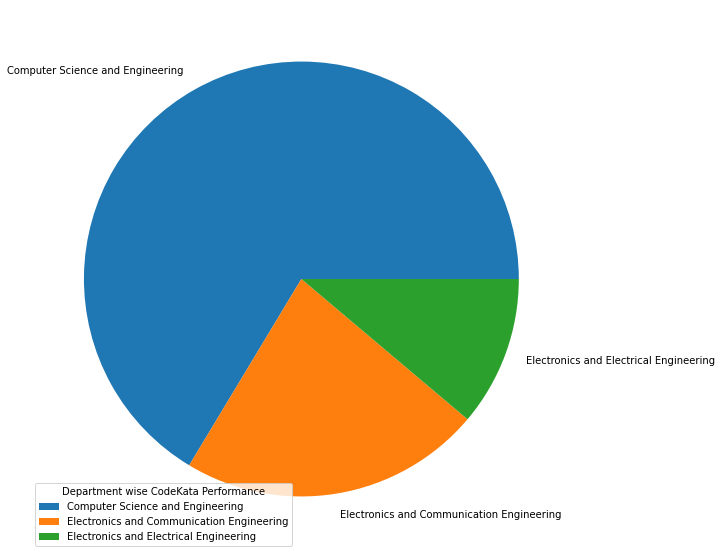

                                           CodeKata Score
Department                                               
Computer Science and Engineering                   320025
Electronics and Communication Engineering          108335
Electronics and Electrical Engineering              53800


In [115]:
dep_perf=df[['CodeKata Score','Department']].groupby('Department').sum()
plt.figure(figsize=(10,10))
plt.pie(dep_perf,labels=dep_perf.index)
plt.legend(title='Department wise CodeKata Performance',loc='lower left')
plt.show()
print(dep_perf)

###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

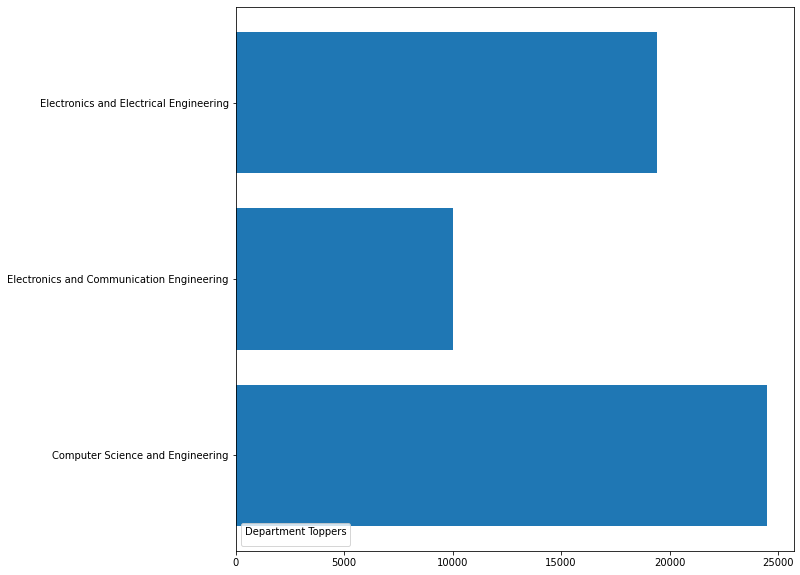

                                  Department  CodeKata Score
0           Computer Science and Engineering           24500
1  Electronics and Communication Engineering           10040
2     Electronics and Electrical Engineering           19400


In [131]:
dep_top=df[['CodeKata Score','Department']].groupby('Department').max()
dep_top.reset_index(inplace=True)
plt.figure(figsize=(10,10))
plt.barh(dep_top.Department,dep_top['CodeKata Score'])
plt.legend(title='Department Toppers',loc='lower left')
plt.show()
print(dep_top)

,Department,CodeKata Score
0,Computer Science and Engineering,24500
1,Electronics and Communication Engineering,10040
2,Electronics and Electrical Engineering,19400
